In [1]:
!pip install pandas pyarrow



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# سوال 7
import pandas as pd
df_match = pd.read_parquet("C:/Users/Hossein/Desktop/tennis_data/20240202/data/raw/raw_statistics_parquet")
print(df_match.columns)

Index(['match_id', 'period', 'statistic_category_name', 'statistic_name',
       'home_stat', 'away_stat', 'compare_code', 'statistic_type',
       'value_type', 'home_value', 'away_value', 'home_total', 'away_total'],
      dtype='object')


In [7]:
print(df_match.columns)
df_match.head()


Index(['match_id', 'period', 'statistic_category_name', 'statistic_name',
       'home_stat', 'away_stat', 'compare_code', 'statistic_type',
       'value_type', 'home_value', 'away_value', 'home_total', 'away_total'],
      dtype='object')


,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11998445,ALL,service,aces,12,6,1,positive,event,12,6,NaN,NaN
1,11998445,ALL,service,double_faults,2,7,2,negative,event,2,7,NaN,NaN
2,11998445,ALL,service,first_serve,57/101 (56%),53/90 (59%),2,positive,team,57,53,101.0,90.0
3,11998445,ALL,service,second_serve,42/44 (95%),30/37 (81%),1,positive,team,42,30,44.0,37.0
4,11998445,ALL,service,first_serve_points,42/57 (74%),39/53 (74%),1,positive,team,42,39,57.0,53.0


In [ ]:
import pandas as pd

df_aces = df_match[df_match['statistic_name'] == 'aces'].copy()

# تبدیل مقدارهای متنی به عدد 
df_aces['home_value'] = pd.to_numeric(df_aces['home_value'], errors='coerce')
df_aces['away_value'] = pd.to_numeric(df_aces['away_value'], errors='coerce')

# جمع تعداد aces در هر مسابقه
df_aces['total_aces'] = df_aces['home_value'] + df_aces['away_value']

# محاسبه میانگین
average_aces = df_aces['total_aces'].mean()

# نمایش نتیجه
print(f"🎾 میانگین تعداد Aces در هر مسابقه (بر اساس داده موجود): {average_aces:.2f}")


🎾 میانگین تعداد Aces در هر مسابقه (بر اساس داده موجود): 4.58


In [9]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Hossein\AppData\Local\Temp\ipykernel_6580\1522644279.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=top15, x='match_id', y='total_aces', palette='crest')


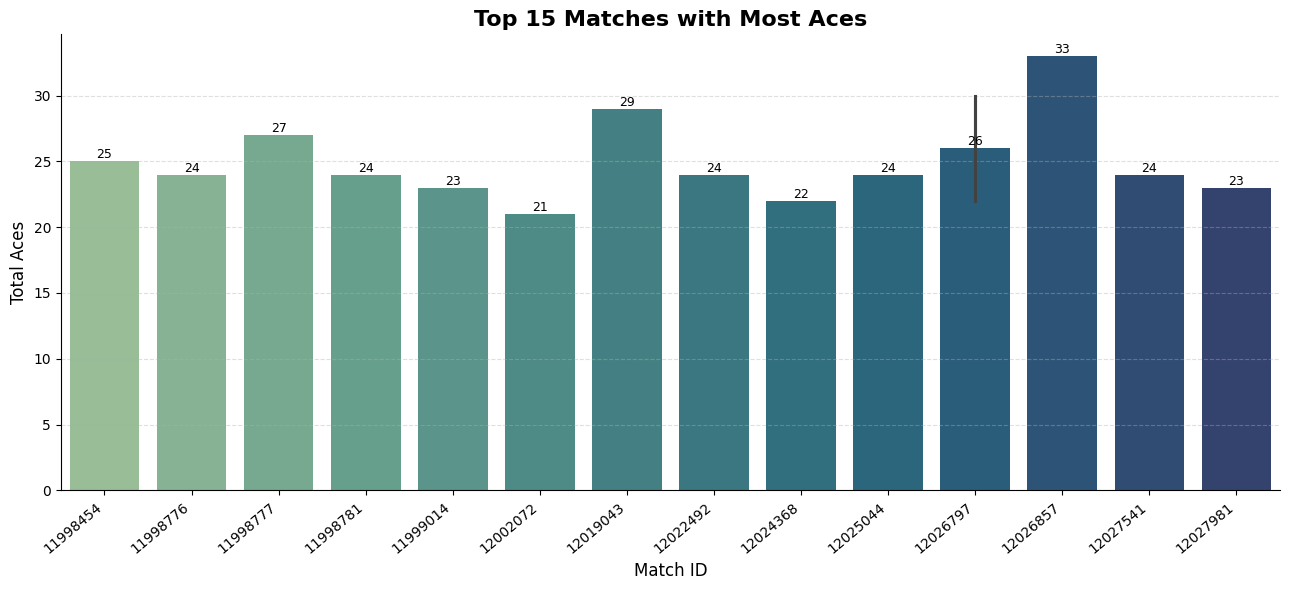

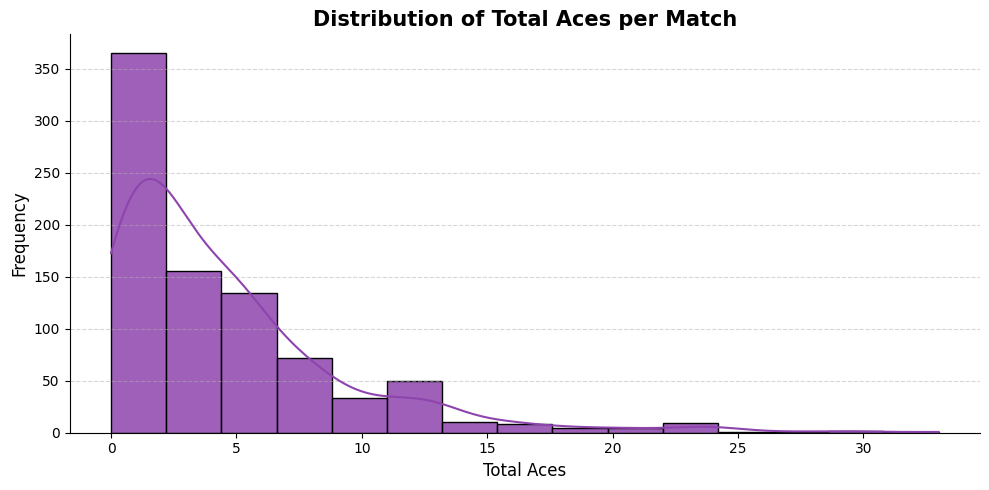

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# آماده‌سازی
df_aces = df_match[df_match['statistic_name'] == 'aces'].copy()
df_aces['home_value'] = pd.to_numeric(df_aces['home_value'], errors='coerce')
df_aces['away_value'] = pd.to_numeric(df_aces['away_value'], errors='coerce')
df_aces['total_aces'] = df_aces['home_value'] + df_aces['away_value']
df_aces = df_aces.dropna(subset=['total_aces'])

# ────────────────────────
# Bar Plot
plt.figure(figsize=(13, 6))
top15 = df_aces.sort_values('total_aces', ascending=False).head(15)

bar = sns.barplot(data=top15, x='match_id', y='total_aces', palette='crest')

for p in bar.patches:
    height = p.get_height()
    bar.annotate(f'{height:.0f}', (p.get_x() + p.get_width()/2., height),
                 ha='center', va='bottom', fontsize=9)

plt.title("Top 15 Matches with Most Aces", fontsize=16, weight='bold')
plt.xlabel("Match ID", fontsize=12)
plt.ylabel("Total Aces", fontsize=12)
plt.xticks(rotation=40, ha='right', fontsize=10)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# ذخیره به فایل
plt.savefig("aces_barplot.png", dpi=300, bbox_inches='tight')
plt.show()

# ────────────────────────
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_aces['total_aces'], bins=15, kde=True, color='#8e44ad', alpha=0.85)

plt.title("Distribution of Total Aces per Match", fontsize=15, weight='bold')
plt.xlabel("Total Aces", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# ذخیره به فایل
plt.savefig("aces_histogram.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# سوال 4
import pandas as pd 
df_matchinfo = pd.read_parquet(r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_match_parquet")
print(df_matchinfo.columns)
df_matchinfo.head()


Index(['match_id', 'name', 'slug', 'gender', 'user_count', 'residence',
       'birthplace', 'height', 'weight', 'plays', 'turned_pro',
       'current_prize', 'total_prize', 'player_id', 'current_rank',
       'name_code', 'country', 'full_name'],
      dtype='object')


,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,11998445,Auger-Aliassime F.,auger-aliassime-felix,M,23318.0,"Monte Carlo, Monaco","Montreal, Canada",1.93,87.0,right-handed,2017,218538.0,10166964.0,192013.0,30.0,AUG,Canada,"Auger-Aliassime, Felix"
1,11998446,Cobolli F.,flavio-cobolli,M,5960.0,Rome,"Florence, Italy",1.83,71.0,right-handed,None,171599.0,801778.0,273680.0,69.0,COB,Italy,Flavio Cobolli
2,11998447,Martínez P.,martinez-pedro,M,2621.0,"Valencia, Spain","Alzira, Spain",1.85,76.0,right-handed,2016,39448.0,2732689.0,77223.0,101.0,MAR,Spain,"Martinez, Pedro"
3,11998452,Cobolli F.,flavio-cobolli,M,5995.0,Rome,"Florence, Italy",1.83,71.0,right-handed,None,178358.0,808536.0,273680.0,69.0,COB,Italy,Flavio Cobolli
4,11998453,Auger-Aliassime F.,auger-aliassime-felix,M,23302.0,"Monte Carlo, Monaco","Montreal, Canada",1.93,87.0,right-handed,2017,218538.0,10166964.0,192013.0,30.0,AUG,Canada,"Auger-Aliassime, Felix"


In [16]:
import pandas as pd 
df_points = pd.read_parquet(r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_point_by_point_parquet")
print(df_points.columns)
df_points.head()


Index(['match_id', 'set_id', 'game_id', 'point_id', 'home_point', 'away_point',
       'point_description', 'home_point_type', 'away_point_type', 'home_score',
       'away_score', 'serving', 'scoring'],
      dtype='object')


,match_id,set_id,game_id,point_id,home_point,away_point,point_description,home_point_type,away_point_type,home_score,away_score,serving,scoring
0,11998445,3,13,0,1,0,0,6,5,6,7,1,2
1,11998445,3,13,1,1,1,0,5,6,6,7,1,2
2,11998445,3,13,2,1,2,0,5,6,6,7,1,2
3,11998445,3,13,3,1,3,0,5,1,6,7,1,2
4,11998445,3,13,4,1,4,0,5,1,6,7,1,2


In [17]:
import pandas as dp 
df_power = pd.read_parquet(r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_tennis_power_parquet")
print(df_power.columns)
df_power.head()


Index(['match_id', 'set_num', 'game_num', 'value', 'break_occurred'], dtype='object')


,match_id,set_num,game_num,value,break_occurred
0,11998445,1,1,-52.80,False
1,11998445,1,2,48.14,False
2,11998445,1,3,-51.62,False
3,11998445,1,4,10.00,False
4,11998445,1,5,26.60,True


C:\Users\Hossein\AppData\Local\Temp\ipykernel_6580\1831978639.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


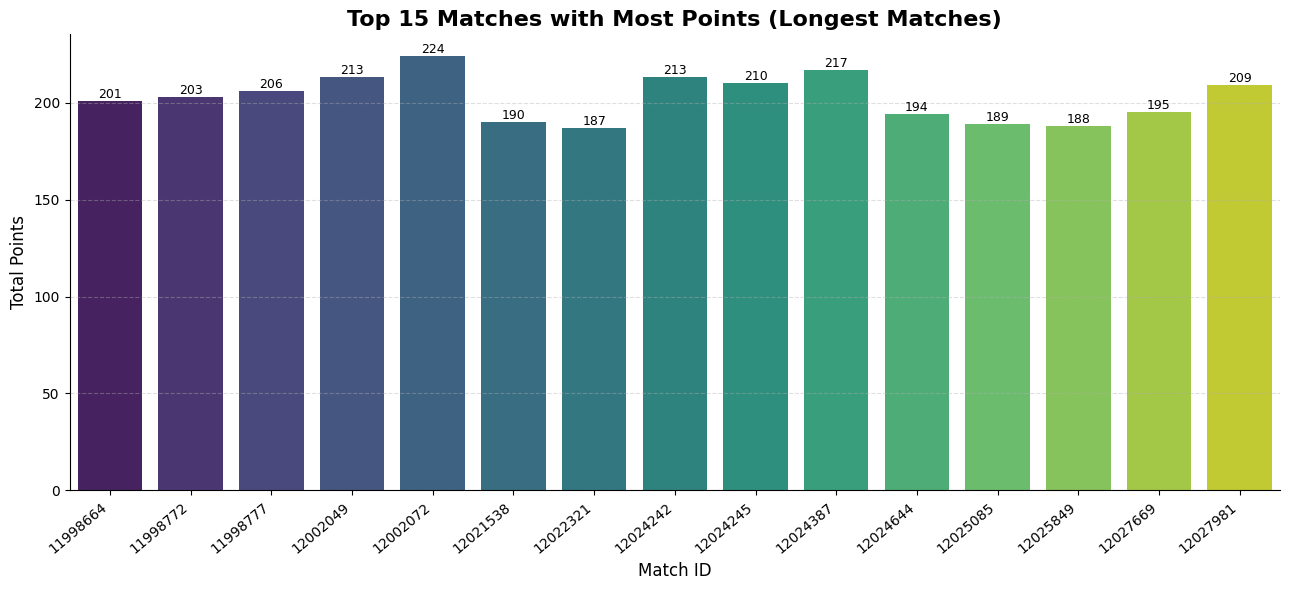

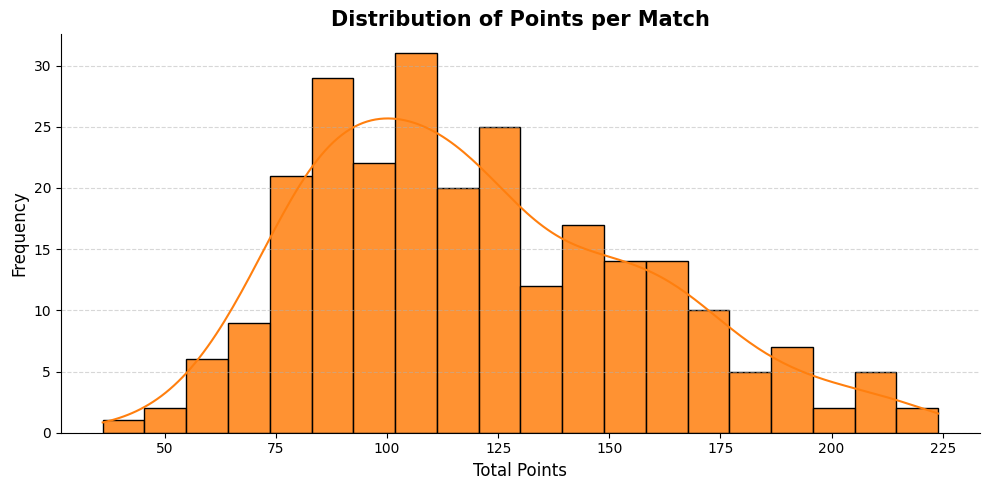

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ─────────────────────────────
# 1) ساخت جدول تعداد امتیاز در هر مسابقه
match_point_counts = (
    df_points
    .groupby('match_id')
    .size()
    .reset_index(name='num_points')
    .sort_values('num_points', ascending=False)
)

# ─────────────────────────────
# 2) Bar Plot از 15 مسابقهٔ طولانی‌تر
plt.figure(figsize=(13, 6))
top15 = match_point_counts.head(15)

bar = sns.barplot(
    data=top15,
    x='match_id',
    y='num_points',
    palette='viridis'
)

# نمایش مقدار روی هر ستون
for p in bar.patches:
    height = p.get_height()
    bar.annotate(f'{height:.0f}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=9)

plt.title("Top 15 Matches with Most Points (Longest Matches)", fontsize=16, weight='bold')
plt.xlabel("Match ID", fontsize=12)
plt.ylabel("Total Points", fontsize=12)
plt.xticks(rotation=40, ha='right', fontsize=10)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# ذخیره به PDF
plt.savefig("longest_matches_barplot.pdf", bbox_inches='tight')
plt.show()

# ─────────────────────────────
# 3) Histogram از توزیع تعداد امتیازها
plt.figure(figsize=(10, 5))
sns.histplot(match_point_counts['num_points'],
             bins=20, kde=True, color='#ff7f0e', alpha=0.85)

plt.title("Distribution of Points per Match", fontsize=15, weight='bold')
plt.xlabel("Total Points", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# ذخیره به PDF
plt.savefig("points_distribution_histogram.pdf", bbox_inches='tight')
plt.show()


In [ ]:
# سوال 6
import pandas as pd

# فرض بر اینکه df_players از raw_match_parquet قبلاً لود شده
df_players = pd.read_parquet(r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_match_parquet")

# بررسی کشورها
country_counts = df_players['country'].value_counts().reset_index()
country_counts.columns = ['country', 'num_players']

# نمایش ۱۰ کشور اول
print(country_counts.head(10))


     country  num_players
0     France           62
1        USA           57
2      Italy           35
3      Egypt           34
4     Russia           33
5      Japan           27
6  Australia           26
7      India           25
8    Germany           24
9    Tunisia           22


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_players = pd.read_parquet(r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_match_parquet")

# شمارش تعداد بازیکنان هر کشور
country_counts = df_players['country'].value_counts().reset_index()
country_counts.columns = ['country', 'num_players']

# انتخاب 10 کشور اول برای نمودار
top10 = country_counts.head(10)


C:\Users\Hossein\AppData\Local\Temp\ipykernel_6580\1732618056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y='country', x='num_players', palette='viridis')


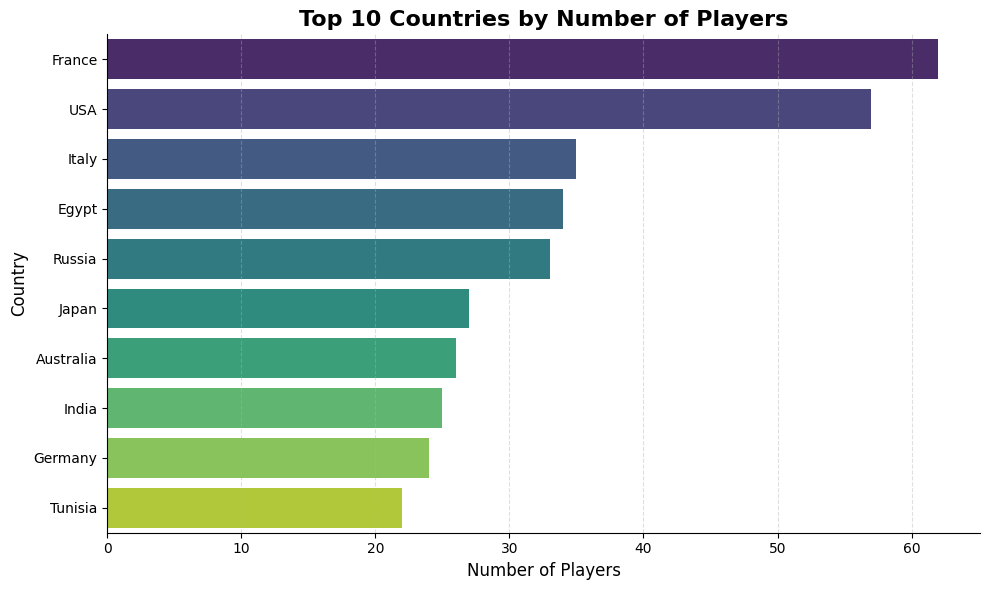

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, y='country', x='num_players', palette='viridis')

plt.title("Top 10 Countries by Number of Players", fontsize=16, weight='bold')
plt.xlabel("Number of Players", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
sns.despine()
plt.tight_layout()
plt.savefig("top_countries_barplot.pdf", bbox_inches='tight')
plt.show()
plt.savefig("top_countries_barplot.png", dpi=300, bbox_inches='tight')


In [29]:
plt.savefig("top_countries_barplot.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

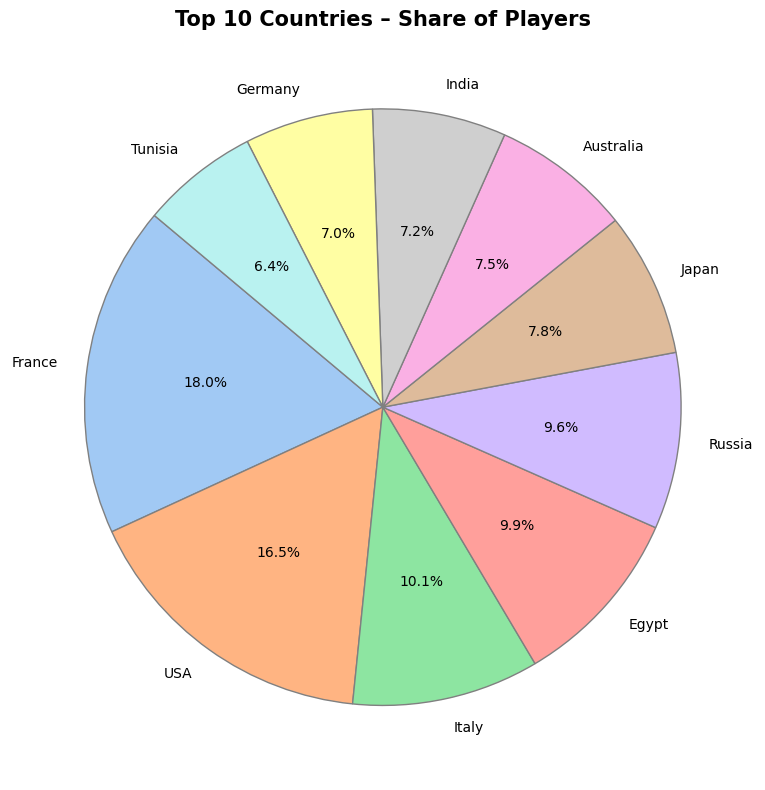

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(top10['num_players'], labels=top10['country'], autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'gray'})

plt.title("Top 10 Countries – Share of Players", fontsize=15, weight='bold')
plt.tight_layout()
plt.savefig("top_countries_piechart.pdf", bbox_inches='tight')
plt.show()


In [27]:
plt.savefig("top_countries_barplot.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

C:\Users\Hossein\AppData\Local\Temp\ipykernel_6580\2072252543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y='country', x='num_players', palette='viridis')


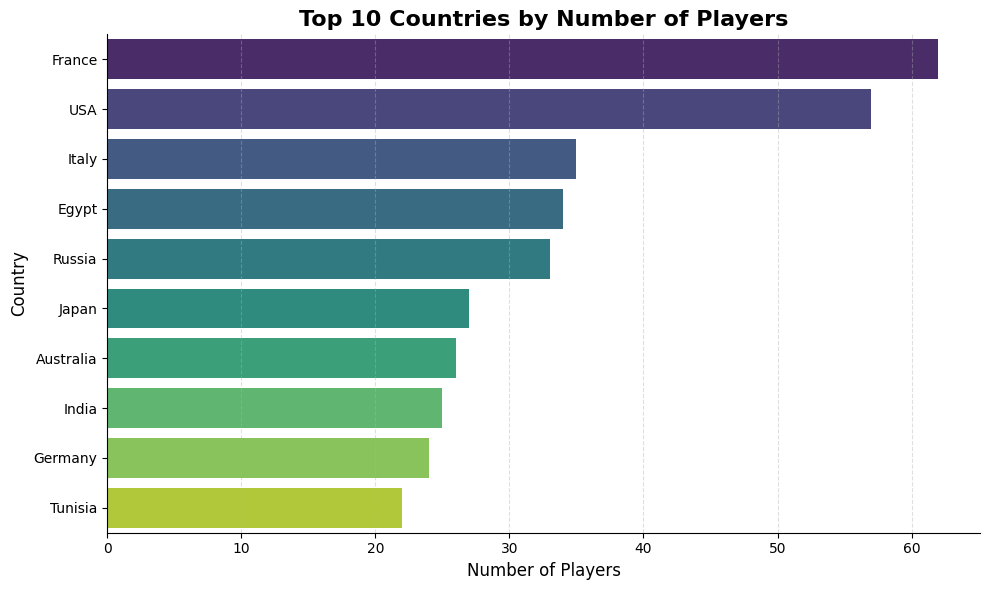

In [ ]:
# سوال 10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# بارگذاری داده و شمارش کشورها
df_players = pd.read_parquet(r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_match_parquet")
country_counts = df_players['country'].value_counts().reset_index()
country_counts.columns = ['country', 'num_players']
top10 = country_counts.head(10)

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, y='country', x='num_players', palette='viridis')

plt.title("Top 10 Countries by Number of Players", fontsize=16, weight='bold')
plt.xlabel("Number of Players", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
sns.despine()
plt.tight_layout()

# ذخیره به PNG
plt.savefig("top_countries_barplot.png", dpi=300, bbox_inches='tight')
plt.show()


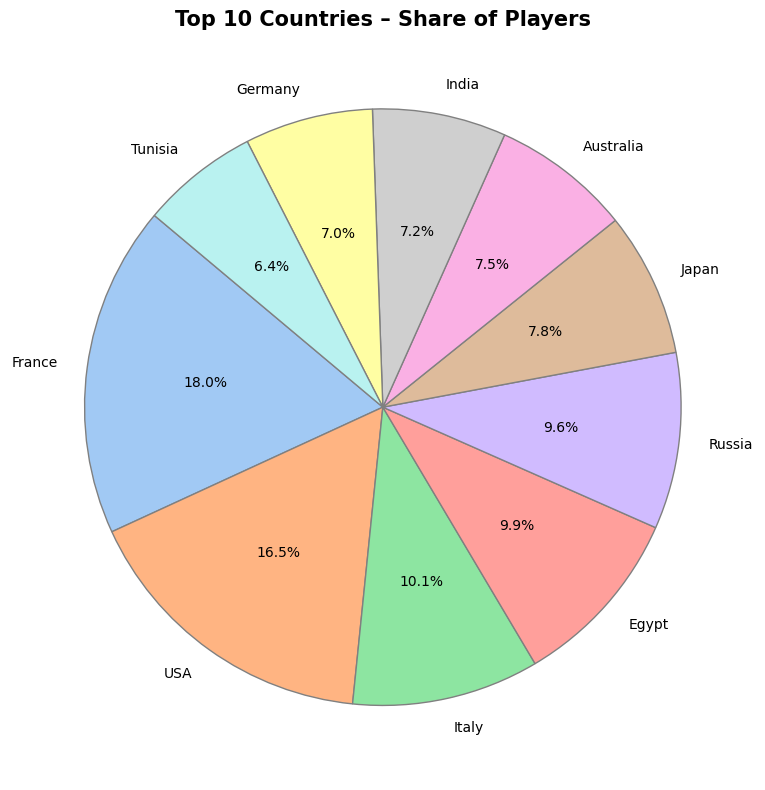

In [32]:
# رسم نمودار دایره‌ای
plt.figure(figsize=(8, 8))
plt.pie(top10['num_players'],
        labels=top10['country'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel'),
        wedgeprops={'edgecolor': 'gray'})

plt.title("Top 10 Countries – Share of Players", fontsize=15, weight='bold')
plt.tight_layout()

# ذخیره به PNG
plt.savefig("top_countries_piechart.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# سوال 11
df_stats = pd.read_parquet(r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_statistics_parquet")
print(df_stats.columns)
df_stats.head()


Index(['match_id', 'period', 'statistic_category_name', 'statistic_name',
       'home_stat', 'away_stat', 'compare_code', 'statistic_type',
       'value_type', 'home_value', 'away_value', 'home_total', 'away_total'],
      dtype='object')


,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11998445,ALL,service,aces,12,6,1,positive,event,12,6,NaN,NaN
1,11998445,ALL,service,double_faults,2,7,2,negative,event,2,7,NaN,NaN
2,11998445,ALL,service,first_serve,57/101 (56%),53/90 (59%),2,positive,team,57,53,101.0,90.0
3,11998445,ALL,service,second_serve,42/44 (95%),30/37 (81%),1,positive,team,42,30,44.0,37.0
4,11998445,ALL,service,first_serve_points,42/57 (74%),39/53 (74%),1,positive,team,42,39,57.0,53.0


In [ ]:
df_match = pd.read_parquet(r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_match_parquet")
print(df_match.columns)
df_match.head()


In [1]:
import pandas as pd
import os

# مسیر اصلی داده‌ها
base_path = r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw"

# اسم پوشه‌ها
folders = [
    "raw_match_parquet",
    "raw_odds_parquet",
    "raw_point_by_point_parquet",
    "raw_statistics_parquet",
    "raw_tennis_power_parquet",
    "raw_votes_parquet",
]

# چک کردن ستون‌ها
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    try:
        for file in os.listdir(folder_path):
            if file.endswith(".parquet"):
                df = pd.read_parquet(os.path.join(folder_path, file))
                print(f"\n📂 File: {file} (from {folder})")
                print("Columns:", list(df.columns))
                break  # فقط یک فایل از هر پوشه کافی است
    except Exception as e:
        print(f"❌ Couldn't read from {folder}: {e}")



📂 File: away_team_11998445.parquet (from raw_match_parquet)
Columns: ['match_id', 'name', 'slug', 'gender', 'user_count', 'residence', 'birthplace', 'height', 'weight', 'plays', 'turned_pro', 'current_prize', 'total_prize', 'player_id', 'current_rank', 'name_code', 'country', 'full_name']

📂 File: odds_11974052.parquet (from raw_odds_parquet)
Columns: ['match_id', 'market_id', 'market_name', 'is_live', 'suspended', 'initial_fractional_value', 'fractional_value', 'choice_name', 'choice_source_id', 'winnig', 'change']

📂 File: pbp_11998445.parquet (from raw_point_by_point_parquet)
Columns: ['match_id', 'set_id', 'game_id', 'point_id', 'home_point', 'away_point', 'point_description', 'home_point_type', 'away_point_type', 'home_score', 'away_score', 'serving', 'scoring']

📂 File: statistics_11998445.parquet (from raw_statistics_parquet)
Columns: ['match_id', 'period', 'statistic_category_name', 'statistic_name', 'home_stat', 'away_stat', 'compare_code', 'statistic_type', 'value_type', 'ho

In [2]:
import pandas as pd

# مسیر فایل point by point
file_path = r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_point_by_point_parquet\pbp_11998445.parquet"

# خواندن فایل
df_pbp = pd.read_parquet(file_path)

# بررسی اولیه
print(df_pbp.head())
print(df_pbp.columns)

# محاسبه تعداد امتیاز برای هر match_id
point_counts = df_pbp.groupby('match_id').size().reset_index(name='point_count')

# فرض: هر امتیاز به‌طور میانگین 40 ثانیه طول می‌کشه
point_counts['duration_minutes'] = (point_counts['point_count'] * 40) / 60

# نمایش چند نمونه
print(point_counts.head(10))

# آمار کلی مدت زمان مسابقات
print("\n📊 آمار مدت‌زمان تخمینی مسابقات (بر حسب دقیقه):")
print(point_counts['duration_minutes'].describe())


   match_id  set_id  game_id  point_id home_point away_point  \
0  11998445       3       13         0          1          0   
1  11998445       3       13         1          1          1   
2  11998445       3       13         2          1          2   
3  11998445       3       13         3          1          3   
4  11998445       3       13         4          1          4   

   point_description  home_point_type  away_point_type  home_score  \
0                  0                6                5           6   
1                  0                5                6           6   
2                  0                5                6           6   
3                  0                5                1           6   
4                  0                5                1           6   

   away_score  serving  scoring  
0           7        1        2  
1           7        1        2  
2           7        1        2  
3           7        1        2  
4           7        1  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load point-by-point data
file_path = r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_point_by_point_parquet\pbp_11998445.parquet"
df_pbp = pd.read_parquet(file_path)

# Compute number of points per match
point_counts = df_pbp.groupby('match_id').size().reset_index(name='point_count')

# Assume each point takes 40 seconds on average
point_counts['duration_minutes'] = (point_counts['point_count'] * 40) / 60


In [6]:
print(point_counts['duration_minutes'].describe())


count      1.0
mean     106.0
std        NaN
min      106.0
25%      106.0
50%      106.0
75%      106.0
max      106.0
Name: duration_minutes, dtype: float64


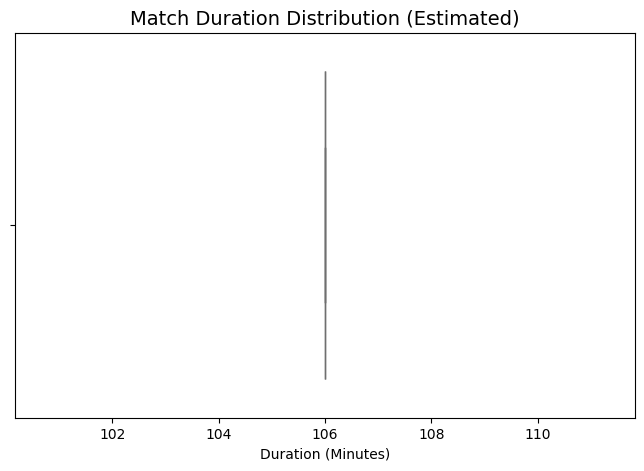

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=point_counts['duration_minutes'], color='skyblue')
plt.title("Match Duration Distribution (Estimated)", fontsize=14)
plt.xlabel("Duration (Minutes)")
plt.savefig("match_duration_boxplot.png", dpi=300)
plt.show()


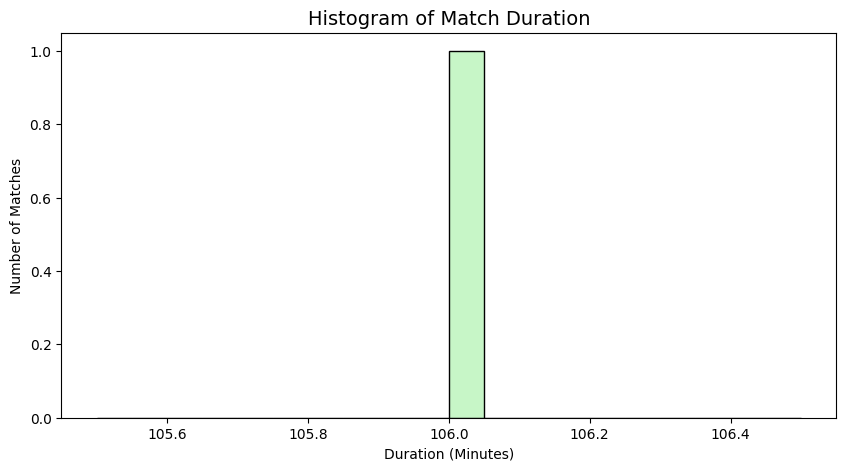

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(point_counts['duration_minutes'], bins=20, kde=True, color='lightgreen')
plt.title("Histogram of Match Duration", fontsize=14)
plt.xlabel("Duration (Minutes)")
plt.ylabel("Number of Matches")
plt.savefig("match_duration_histogram.png", dpi=300)
plt.show()


In [ ]:
# سوال 14
import pandas as pd

file_path = r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_point_by_point_parquet\pbp_11998445.parquet"

# بارگذاری فایل
df_pbp = pd.read_parquet(file_path)

# نمایش چند سطر اول
print(df_pbp.head())


   match_id  set_id  game_id  point_id home_point away_point  \
0  11998445       3       13         0          1          0   
1  11998445       3       13         1          1          1   
2  11998445       3       13         2          1          2   
3  11998445       3       13         3          1          3   
4  11998445       3       13         4          1          4   

   point_description  home_point_type  away_point_type  home_score  \
0                  0                6                5           6   
1                  0                5                6           6   
2                  0                5                6           6   
3                  0                5                1           6   
4                  0                5                1           6   

   away_score  serving  scoring  
0           7        1        2  
1           7        1        2  
2           7        1        2  
3           7        1        2  
4           7        1  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# محاسبه تعداد امتیازها در هر مسابقه
point_counts = df_pbp.groupby('match_id').size().reset_index(name='point_count')

# نمایش آمار توصیفی
print(point_counts['point_count'].describe())


count      1.0
mean     159.0
std        NaN
min      159.0
25%      159.0
50%      159.0
75%      159.0
max      159.0
Name: point_count, dtype: float64


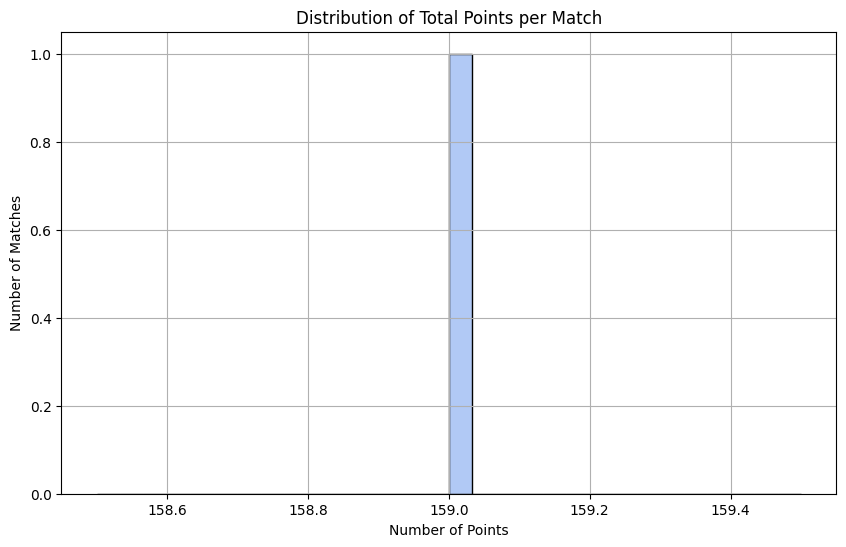

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(point_counts['point_count'], bins=30, kde=True, color='cornflowerblue')
plt.title("Distribution of Total Points per Match")
plt.xlabel("Number of Points")
plt.ylabel("Number of Matches")
plt.grid(True)
plt.savefig("points_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


In [4]:
point_counts['estimated_duration_min'] = point_counts['point_count'] * (60 / 40)
print(point_counts['estimated_duration_min'].describe())


count      1.0
mean     238.5
std        NaN
min      238.5
25%      238.5
50%      238.5
75%      238.5
max      238.5
Name: estimated_duration_min, dtype: float64


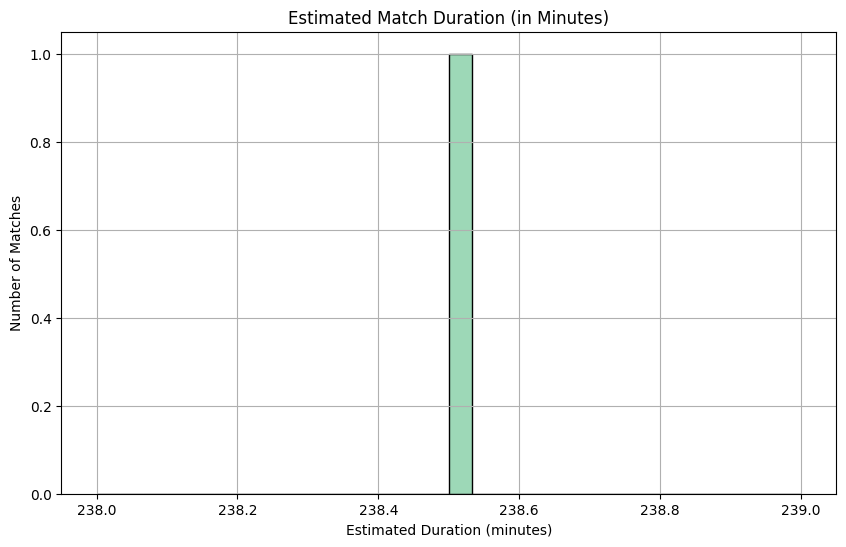

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(point_counts['estimated_duration_min'], bins=30, kde=True, color='mediumseagreen')
plt.title("Estimated Match Duration (in Minutes)")
plt.xlabel("Estimated Duration (minutes)")
plt.ylabel("Number of Matches")
plt.grid(True)
plt.savefig("estimated_durations.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\Hossein\AppData\Local\Temp\ipykernel_12224\2823154112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='serving', data=df_pbp, palette='Set2')


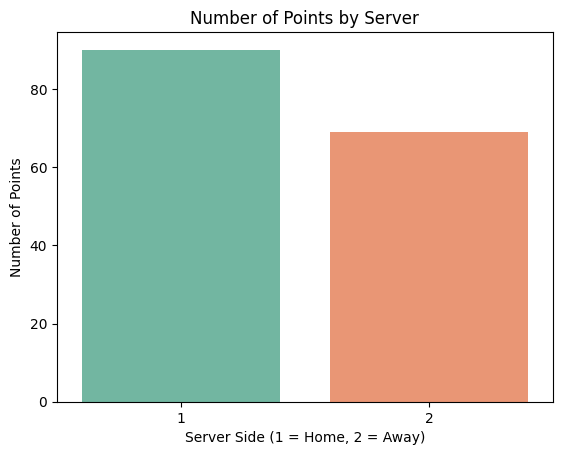

In [6]:
# توزیع سرویس‌دهنده
sns.countplot(x='serving', data=df_pbp, palette='Set2')
plt.title("Number of Points by Server")
plt.xlabel("Server Side (1 = Home, 2 = Away)")
plt.ylabel("Number of Points")
plt.savefig("server_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


In [8]:
# سوال 15
import pandas as pd

file_path = r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_match_parquet\away_team_11998445.parquet"

# خواندن فایل
df = pd.read_parquet(file_path)

# نمایش ستون‌ها
print("ستون‌های فایل:", df.columns.tolist())


ستون‌های فایل: ['match_id', 'name', 'slug', 'gender', 'user_count', 'residence', 'birthplace', 'height', 'weight', 'plays', 'turned_pro', 'current_prize', 'total_prize', 'player_id', 'current_rank', 'name_code', 'country', 'full_name']


In [9]:
# حذف مقادیر خالی و شمارش کشورها
df['country'] = df['country'].dropna()
unique_countries = df['country'].nunique()

print(f"✅ تعداد کشورهای منحصربه‌فرد در دیتاست: {unique_countries}")


✅ تعداد کشورهای منحصربه‌فرد در دیتاست: 1


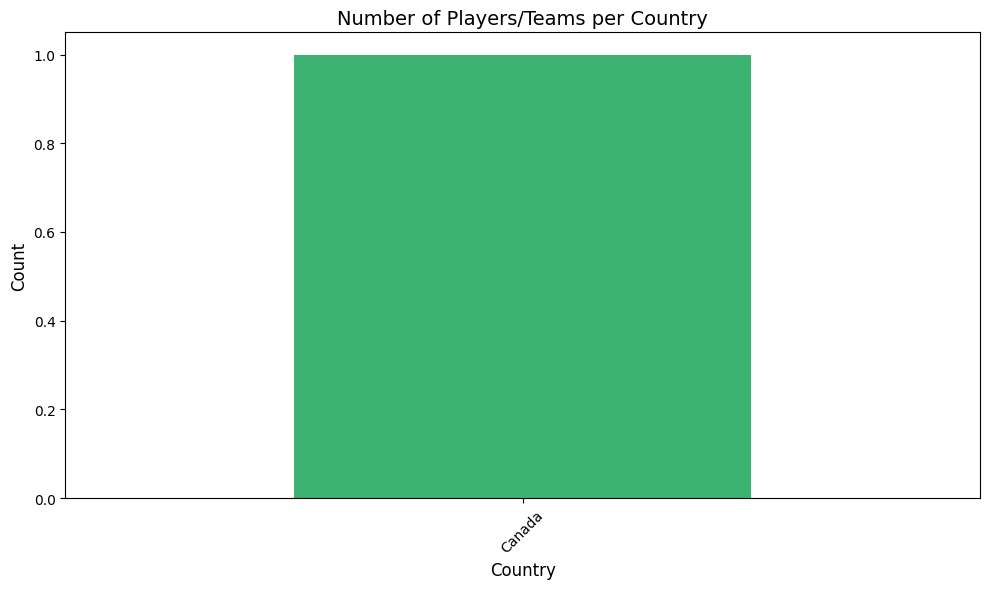

In [10]:
import matplotlib.pyplot as plt

# شمارش تعداد بازیکن یا تیم در هر کشور
country_counts = df['country'].value_counts().sort_values(ascending=False)

# رسم نمودار میله‌ای
plt.figure(figsize=(10,6))
country_counts.plot(kind='bar', color='mediumseagreen')
plt.title("Number of Players/Teams per Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# ذخیره تصویر
plt.savefig("countries_distribution.png", dpi=300)

plt.show()


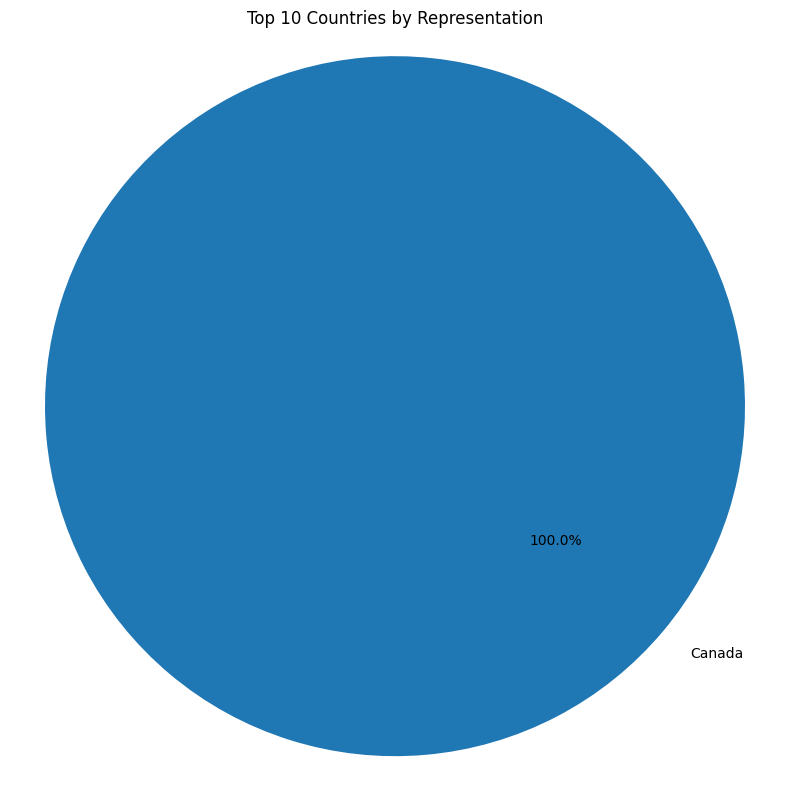

In [11]:
top_countries = df['country'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Countries by Representation")
plt.axis('equal')  
plt.tight_layout()
plt.savefig("top_countries_piechart.png", dpi=300)
plt.show()


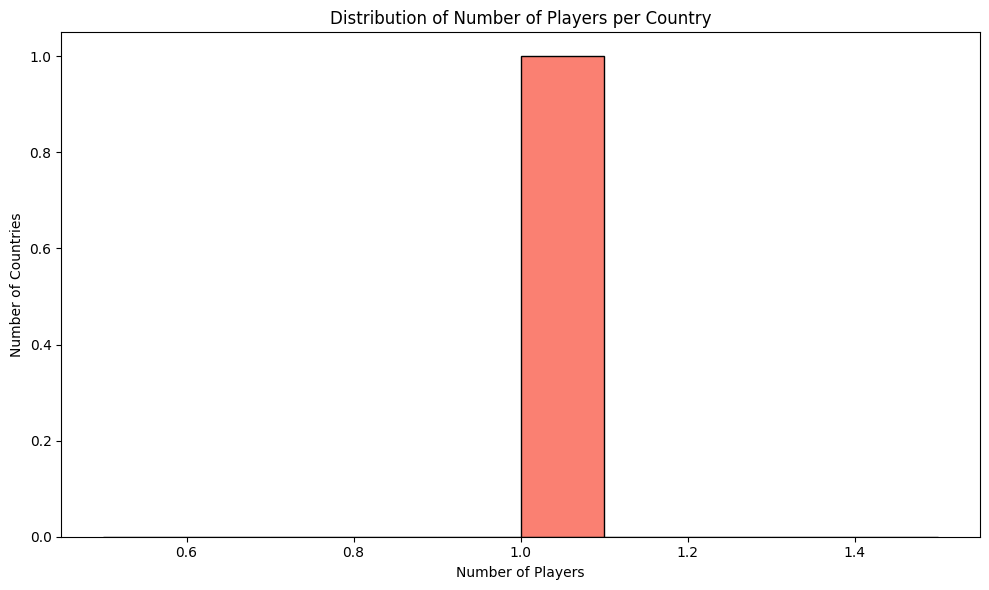

In [12]:
country_counts = df['country'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(country_counts, bins=10, color='salmon', edgecolor='black')
plt.title("Distribution of Number of Players per Country")
plt.xlabel("Number of Players")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.savefig("country_histogram.png", dpi=300)
plt.show()


In [15]:
# سوال 9
import pandas as pd
file_path = r"C:\Users\Hossein\Desktop\tennis_data\20240202\data\raw\raw_statistics_parquet\statistics_11998445.parquet"

# خواندن فایل
df_stats = pd.read_parquet(file_path)

# نمایش چند سطر اول
print(df_stats.head())


   match_id period statistic_category_name      statistic_name     home_stat  \
0  11998445    ALL                 service                aces            12   
1  11998445    ALL                 service       double_faults             2   
2  11998445    ALL                 service         first_serve  57/101 (56%)   
3  11998445    ALL                 service        second_serve   42/44 (95%)   
4  11998445    ALL                 service  first_serve_points   42/57 (74%)   

     away_stat  compare_code statistic_type value_type  home_value  \
0            6             1       positive      event          12   
1            7             2       negative      event           2   
2  53/90 (59%)             2       positive       team          57   
3  30/37 (81%)             1       positive       team          42   
4  39/53 (74%)             1       positive       team          42   

   away_value  home_total  away_total  
0           6         NaN         NaN  
1           7     

In [16]:
df_aces = df_stats[df_stats['statistic_name'] == 'aces'].copy()


In [17]:
import re
import numpy as np

def extract_number(val):
    if isinstance(val, str):
        match = re.match(r"^\d+", val)  # استخراج اولین عدد صحیح
        if match:
            return int(match.group())
    elif isinstance(val, (int, float)):
        return val
    return np.nan


In [18]:
df_aces['home_aces'] = df_aces['home_value'].apply(extract_number)
df_aces['away_aces'] = df_aces['away_value'].apply(extract_number)

print(df_aces[['match_id', 'home_aces', 'away_aces']].head())


    match_id  home_aces  away_aces
0   11998445         12          6
20  11998445          2          3
37  11998445          6          3
54  11998445          4          0


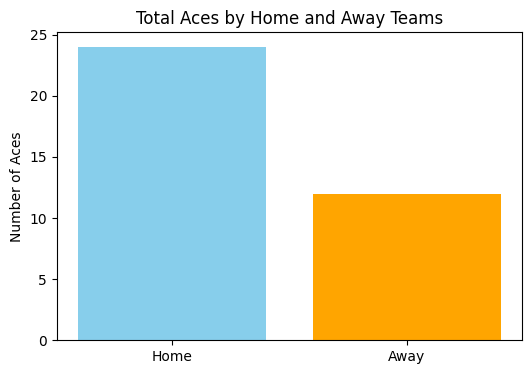

In [19]:
import matplotlib.pyplot as plt

# مجموع ACE های هر تیم
total_home_aces = df_aces['home_aces'].sum()
total_away_aces = df_aces['away_aces'].sum()

# رسم نمودار
plt.figure(figsize=(6, 4))
plt.bar(['Home', 'Away'], [total_home_aces, total_away_aces], color=['skyblue', 'orange'])

plt.title('Total Aces by Home and Away Teams')
plt.ylabel('Number of Aces')
plt.savefig("aces_bar_chart_q9.png", dpi=300)  # ذخیره تصویر
plt.show()


In [20]:
print("Home Aces Stats:\n", df_aces['home_aces'].describe())
print("Away Aces Stats:\n", df_aces['away_aces'].describe())


Home Aces Stats:
 count     4.000000
mean      6.000000
std       4.320494
min       2.000000
25%       3.500000
50%       5.000000
75%       7.500000
max      12.000000
Name: home_aces, dtype: float64
Away Aces Stats:
 count    4.00000
mean     3.00000
std      2.44949
min      0.00000
25%      2.25000
50%      3.00000
75%      3.75000
max      6.00000
Name: away_aces, dtype: float64
